# Homework 1 Solution [DAPT 631]

The dataset for this homework exercise is borrowed from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wine+Quality).

In [1]:
import pandas as pd

In [ ]:
'''
# this code was used to read two separate datasets from UCI Machine Learning repo and combine them to create one consolidated data set.

df_white = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
df_white['wine type'] = 'White'

df_red = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
df_red['wine type'] = 'Red'

df = pd.concat([df_white, df_red], axis=0)

df.to_csv(r'../data/winequality.csv')
'''

Read data.

In [2]:
# read data from the csv file
# ignore the first (index) column while reading data in

df = pd.read_csv(r'../data/winequality.csv', index_col=0)

# always check the shape (number of rows and columns)
df.shape

(6497, 13)

In [3]:
# always take a quick look at the data
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,White
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,White
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,White
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White


In [4]:
# check averages and other descriptive stats
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


**Observations:**

* All variables have a count of 6,497, which is the same as the total number of records in this dataframe. We don't have variables with missing values, which is good to confirm.
* I would also check the min values here -- to ensure that there are no negative values. If there are, that would trigger some investigation (further EDA).
* Some attributes, like sulfur dioxide, vary substantially across different wines (as indicated by their high standard deviation.) 
* The alcohol content ranges between 8 and 14.9. Either seems lower than what I had in mind. I would check the distribution of alcohol to see how many wines have this value.

In [31]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine type'],
      dtype='object')

In [32]:
# replace spaces in column names with underscores

df.columns = df.columns.str.replace(' ', "_")

**1. Plot histograms for all variables in this data set. Add a vertical line to show the average value of each variable. Add a chart title for each chart.**

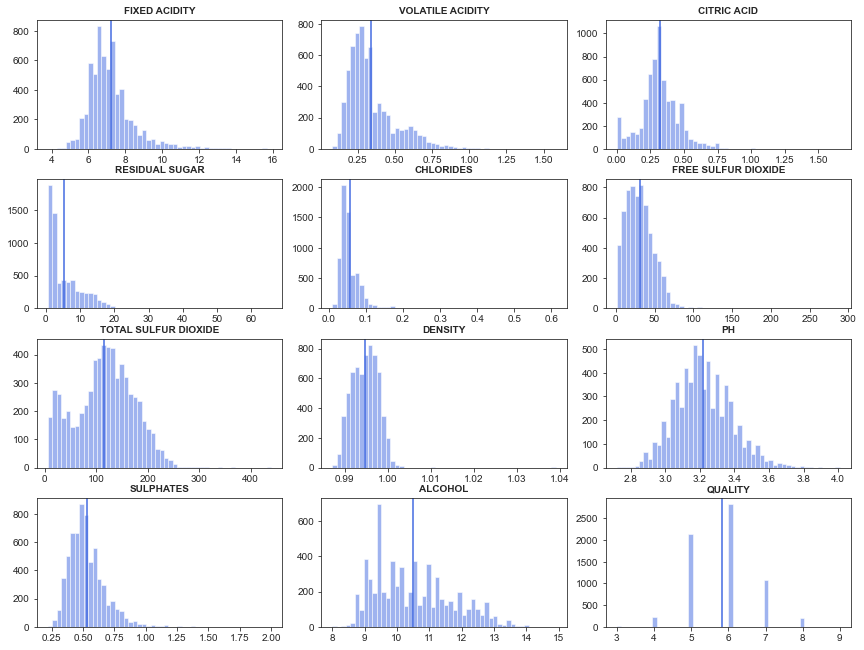

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 9))
fig.tight_layout()

for i, ax in enumerate(axes.flat):
    col = df.columns[i]
    df[col].hist(bins=50, ax=ax, grid=False, color='royalblue', alpha=.5)
    ax.axvline(x=df[col].mean(), color='royalblue')
    ax.set_title(col.upper().replace('_', ' '), weight='bold', size=10);

**Observations:**

* The histogram for alcohol does confirm that there are a very few wines between 8 and 9. 
* The `quality` variable is a numeric variable, but it's not a continuous variable; it's an ordinal variable.
* The sulfur dioxide variables have large variance (standard deviation), but there seems to be some extreme (outlier?) that would affect its stadard deviation. If we were building a model (supervised or unsupervised), it may help to truncate some of these extreme values to make the model more stable.

**2. Identify two features that are most correlated with each other. Visualize their relationship using an appropriate chart type.**

In [36]:
# correlation matrix
df_corr = df.corr()

# flatten the correlation matrix
df_corr = df_corr.stack().reset_index()

# rename columns
df_corr = df_corr.rename(columns={'level_0': 'var1', 'level_1': 'var2', 0: 'corr'})

# absolute correlation
df_corr['abs_corr'] = abs(df_corr['corr'])

# drop rows where var1 and var2 are the same
df_corr = df_corr[df_corr['var1'] != df_corr['var2']]

# sort values
df_corr = df_corr.sort_values(by='abs_corr', ascending=False)

In [21]:
df_corr.head()

,var1,var2,corr,abs_corr
77,total sulfur dioxide,free sulfur dioxide,0.720934,0.720934
66,free sulfur dioxide,total sulfur dioxide,0.720934,0.720934
127,alcohol,density,-0.686745,0.686745
94,density,alcohol,-0.686745,0.686745
87,density,residual sugar,0.552517,0.552517


**Note:** The high correlation between two sulfur dioxide variables is obvious. The second most strongest relationship (between `alcohol` and `density`) might be more interesting to explore or report back to the stakeholders.

In [37]:
# two variables with the highest absolute correlation

df_corr.loc[df_corr['abs_corr'] == max(df_corr['abs_corr'])]

,var1,var2,corr,abs_corr
77,total_sulfur_dioxide,free_sulfur_dioxide,0.720934,0.720934
66,free_sulfur_dioxide,total_sulfur_dioxide,0.720934,0.720934


In [38]:
# while it's not necessary to drop these duplicate rows,
# we can do that using `frozenset`

df_corr = df_corr[~df_corr[['var1', 'var2']].apply(frozenset, axis=1).duplicated()]

# two variables with the highest absolute correlation

df_corr.loc[df_corr['abs_corr'] == max(df_corr['abs_corr'])]

,var1,var2,corr,abs_corr
77,total_sulfur_dioxide,free_sulfur_dioxide,0.720934,0.720934


Scatterplot for the two most correlated variables.

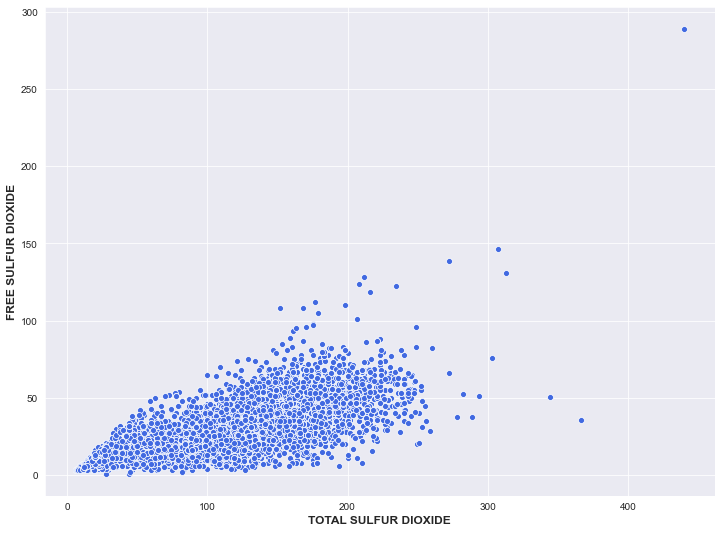

In [39]:
plt.figure(figsize=[12, 9])
sns.set_style('darkgrid')

ax = sns.scatterplot(x='total_sulfur_dioxide', 
                     y='free_sulfur_dioxide', 
                     data=df, 
                     color='royalblue')

plt.xlabel('TOTAL SULFUR DIOXIDE', fontsize=12, weight='bold')
plt.ylabel('FREE SULFUR DIOXIDE', fontsize=12, weight='bold');

As we've noticed before, these two columns contains some extreme and rare values, because of which, it's hard to clearly see the relationship. We can explore another type of chart -- called Kernel Density plot -- that might be more useful here.

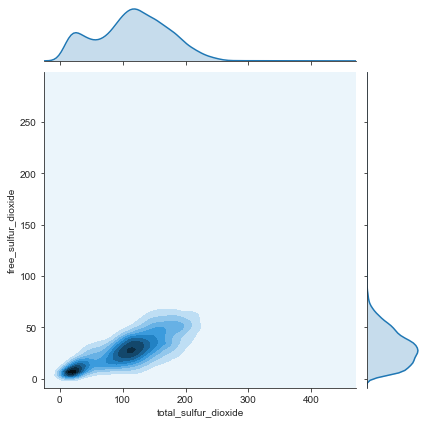

In [40]:
sns.set_style(style='ticks')

sns.jointplot(data=df,
              x='total_sulfur_dioxide', 
              y='free_sulfur_dioxide', 
              kind='kde');

We can zoom in to the area where most values are to see the trend more clearly. Let's find the 90th percentile values for both variables and use those to zoom in.

In [49]:
total_sulfur_dioxide_p90 = df.total_sulfur_dioxide.describe(percentiles=[.9]).T['90%']

free_sulfur_dioxide_p90 = df.free_sulfur_dioxide.describe(percentiles=[.9]).T['90%']

total_sulfur_dioxide_p90, free_sulfur_dioxide_p90

(188.0, 54.0)

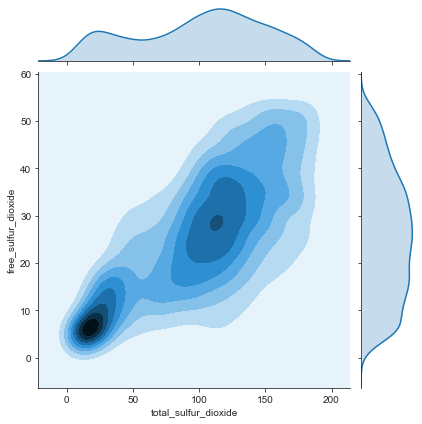

In [52]:
mask = (df.total_sulfur_dioxide < total_sulfur_dioxide_p90) & \
       (df.free_sulfur_dioxide < free_sulfur_dioxide_p90)

sns.jointplot(data=df[mask],
              x='total_sulfur_dioxide', 
              y='free_sulfur_dioxide', 
              kind='kde');

Sometimes, zooming in to a region where most of your data points lie can help reveal patterns that are otherwise not visible.

In [54]:
# let's check the corr coeff in this region

df[mask][['total_sulfur_dioxide', 'free_sulfur_dioxide']].corr()

,total_sulfur_dioxide,free_sulfur_dioxide
total_sulfur_dioxide,1.000000,0.689806
free_sulfur_dioxide,0.689806,1.000000


The correlation coefficient is actually lower as compared to the corr coefficient calculated based on all data points. This shows how extreme/outlier values can affect the relationships between variables.

**3. Identify the feature that is most correlated with the wine quality and plot their relationship using an appropriate chart type.**

In [7]:
df_corr[df_corr['var1'] == 'quality'].sort_values(by='abs_corr', ascending=False)

,var1,var2,corr,abs_corr
142,quality,alcohol,0.444319,0.444319
139,quality,density,-0.305858,0.305858
134,quality,citric acid,0.085532,0.085532
132,quality,fixed acidity,-0.076743,0.076743
137,quality,free sulfur dioxide,0.055463,0.055463
138,quality,total sulfur dioxide,-0.041385,0.041385
135,quality,residual sugar,-0.036980,0.036980
140,quality,pH,0.019506,0.019506


The feature most correlated with `quality`:

In [56]:
most_corr_with_y = df_corr[df_corr['var1'] == 'quality'].sort_values(by='abs_corr', 
                                                                     ascending=False).head(1)['var2'].values[0]

most_corr_with_y

'alcohol'

So... the higher the alcohol content, the higher the wine quality! 

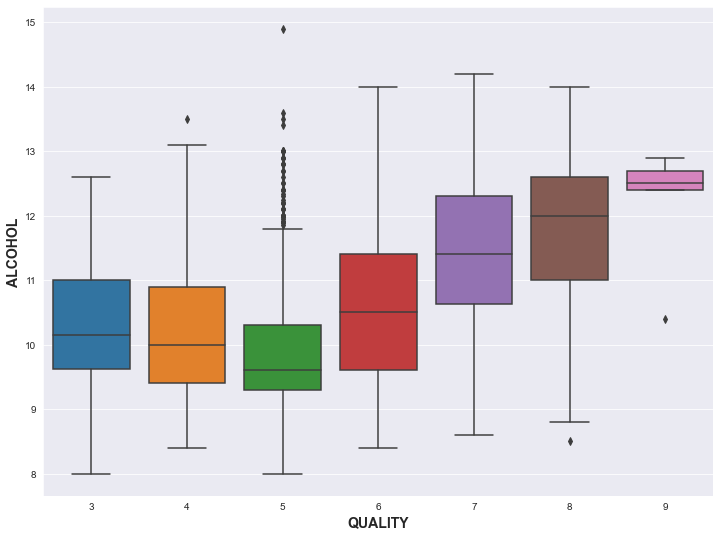

In [9]:
plt.figure(figsize=[12, 9])
sns.set_style('darkgrid')

sns.boxplot(x='quality', y=most_corr_with_y, data=df)

plt.xlabel('QUALITY', fontsize=14, weight='bold')
plt.ylabel('ALCOHOL', fontsize=14, weight='bold');

Although `quality` is a numeric variable in this dataset, it's actually an ordinal variable (with 7 distinct values in this dataset). A box plot (like above) or a violin plot would be more appropriate to view how another continuous variable varies across the different values of `quality`.

**4. Calcuate average alcohol content for each wine quality score. Store the average alcohol content for the best quality wine in a variable called `avg_alcohol_for_best_wine` and print it using the following statement: `print(f'The average alcohol content for best wine is {avg_alcohol_for_best_wine}.')`**

In [57]:
# avg density by quality

df.groupby(['quality'])['alcohol'].mean()

quality
3    10.215000
4    10.180093
5     9.837783
6    10.587553
7    11.386006
8    11.678756
9    12.180000
Name: alcohol, dtype: float64

In [59]:
# average density for the best wine

avg_alcohol_for_best_wine = df[df.quality == df.quality.max()]['alcohol'].mean()

print(f'The average alcohol content for best wine is {avg_alcohol_for_best_wine}.')

The average alcohol content for best wine is 12.18.


**5. Calculate correlation coefficients between wine quality and all other features _separately for each wine type_. Identify any one feature that has contradictory relationships across the wine type. (For example, a feture has positive correlation with the wine quality for red wines, and negative correlation coefficients with the wine quality of white wines.) Plot the relationship of the selected feature with wine quality using an appropriate chart type.**

In [10]:
corr_with_quality_red, corr_with_quality_white = [], []

df_red = df[df['wine type'] == 'Red']
df_white = df[df['wine type'] == 'White']

for col in df.columns[:-1]:
    corr_with_quality_red.append(df_red['quality'].corr(df[col]))
    corr_with_quality_white.append(df_white['quality'].corr(df[col]))
    
# create a dataframe to store the results
df_corr_diff = pd.DataFrame(columns=['feature', 'corr_red', 'corr_white'])

df_corr_diff['feature'] = df.columns[:-1].values
df_corr_diff['corr_red'] = corr_with_quality_red
df_corr_diff['corr_white'] = corr_with_quality_white

# let's select only those rows where the correlations are contradictory 
#  i.e., have the opposite signs
df_corr_diff = df_corr_diff[df_corr_diff['corr_red'] * df_corr_diff['corr_white'] < 0]

df_corr_diff

,feature,corr_red,corr_white
0,fixed acidity,0.062025,-0.054607
2,citric acid,0.117377,-0.010085
3,residual sugar,0.017757,-0.081373
5,free sulfur dioxide,-0.038301,0.004333
8,pH,-0.010949,0.070009


Let's pick `pH` from this list and visualize its relationship with `quality`.

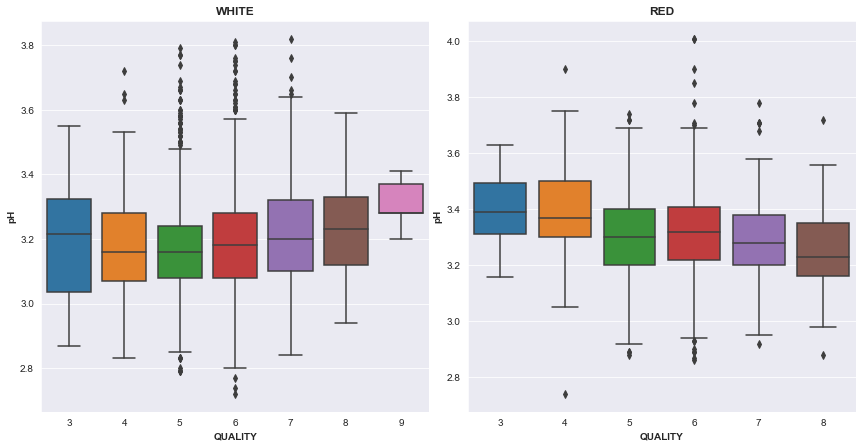

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.tight_layout()

wine_types = df['wine type'].unique()

for i, ax in enumerate(axes.flat):
    wine_type = wine_types[i]
    sns.boxplot(x='quality', y='pH', data=df[df['wine type'] == wine_type], ax=ax)
    ax.set_title(wine_type.upper(), weight='bold', size=12)
    ax.set_xlabel('QUALITY', fontsize=10, weight='bold')
    ax.set_ylabel('pH', fontsize=10, weight='bold');

**Observation:**
We can see here that for white wines, the overall relationship is positive -- however, for the lower quality wines, the relationship is negative.

**Note**: We can also use the `hue` option to include both box plots in one chart.

**6. Create a dataframe (see example below) that contains one the overall average for each variable as well as its average value for Red and White wines. Divide both averages by the overall average to create an index for each variable. Multiply the index columns by 100. Which two variables have the highest index?**

|                 | Red      | White    | Overall  | White_Index | Red_Index  |
|-----------------|----------|----------|----------|-------------|------------|
|fixed acidity	  | 8.319637 | 6.854788 | 7.215307 | 95.003409   | 115.305381 |
|volatile acidity |	0.527821 | 0.278241	| 0.339666 | 81.916094   | 155.3939   |
|.................|..........|..........|..........|.............|............|

In [47]:
grp_avg = df.groupby(['wine type']).mean().T

overall_avg = df.mean().T.to_frame()
overall_avg.columns = ['Overall']

df_avg = grp_avg.join(overall_avg)

df_avg['White_Index'] = 100 * df_avg['White'] / df_avg['Overall']
df_avg['Red_Index'] = 100 * df_avg['Red'] / df_avg['Overall']

df_avg

,Red,White,Overall,While_Index,Red_Index
fixed acidity,8.319637,6.854788,7.215307,95.003409,115.305381
volatile acidity,0.527821,0.278241,0.339666,81.916094,155.393979
citric acid,0.270976,0.334192,0.318633,104.882822,85.043114
residual sugar,2.538806,6.391415,5.443235,117.419411,46.641480
chlorides,0.087467,0.045772,0.056034,81.686956,156.095866
free sulfur dioxide,15.874922,35.308085,30.525319,115.668192,52.005752
total sulfur dioxide,46.467792,138.360657,115.744574,119.539648,40.146843
density,0.996747,0.994027,0.994697,99.932717,100.206098
pH,3.311113,3.188267,3.218501,99.060612,102.877500
sulphates,0.658149,0.489847,0.531268,92.203299,123.882579


This helps understand which attributes differ the most (on average) across white and red wines: chlorides and volatile acidity. 

**7. Replace 'Red' with 1 and 'White' with 0 in the `wine quality` column. What percentage of all records in the dataset are for Red wines?**

In [24]:
df['wine type'] = df['wine type'].replace('Red', 1).replace('White', 0)

pctg_red = df['wine type'].mean()

print(f'Red wines: {pctg_red:.1%}')

Red wines: 24.6%
